<a href="https://colab.research.google.com/github/HosseinEyvazi/Supervised-Learning/blob/main/Linear_Regression_overFittingg_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## regression metrics


*   MAE :
is not derivative

*   MSE : is derivative but is not interpratable
*   RMSE : to fix both above metrics issues


*   R2 : is between 0-1 . higher value is better



## Hyperparameter tuning
note : hyperparamter examples :
* degree of polynomial LINEAR regressoin (note : linearness is based on weights)
* K in KNN
* eps and minPts in DBSCAN ,...


### Methods :
*   Random Search : it maybe better than grid search (runtime , accuracy)

*   Grid search : it's very regular

### Advance methods :
*   Bayesian optimization
*   Hyper band
*   Reinforcement learning-based parameter tuning
*   ...



## Over fitting
### defination :
 an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data.

### How to find the optimal point without over or underfitting ?
note : in this example number of epochs is a hyperparamter \
while training loss is too large , it means underfitting \
while training loss is too small , high difference of training loss and  validation loss means overfitting
<div>
<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2022/02/img_6210aec599a86.svg" alt="Drawing" style="width: 500px;"/>
</div>

## How to solve overfitting :
* Regularization (L1 , L2 , L1+L2) : this penelize the model for high value W(s)
* Elastic Net Regularization
* Early stopping
* Data augmentation
* Weight Decay
* Max-norm Regularization
* Batch normalization
* ...
* ...

## Regression models :


*   Linear regression (or polynomial linear regresssion)

*   Ridge regression (a regression that is using ridge regularization)
* Bayesian regression
*   Lasso regression
* quantile regression

*   elastic net regression
* principal component regression \

and :
* Support vector regression
* decision tree regression
* random forest regression
* gradiant boosting regression
* Least angle regression
* ...

In [37]:
! pip install CatBoost
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer , load_iris
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression # importing linear regression from linear_model MODULE/SUB MODULE
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import Pool, CatBoostRegressor


In [2]:
data = load_breast_cancer().data
columns = load_breast_cancer().feature_names
df = pd.DataFrame(data , columns=columns)
df.sample(7)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
156,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,0.1971,0.06166,...,20.47,25.11,132.90,1302.0,0.1418,0.3498,0.35830,0.15150,0.2463,0.07738
272,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,...,28.19,28.18,195.90,2384.0,0.1272,0.4725,0.58070,0.18410,0.2833,0.08858
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,14.67,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794
187,11.71,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,0.06095,...,13.01,21.39,84.42,521.5,0.1323,0.1040,0.15210,0.10990,0.2572,0.07097
475,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,0.1705,0.05913,...,14.09,19.35,93.22,605.8,0.1326,0.2610,0.34760,0.09783,0.3006,0.07802
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
344,11.71,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,0.06506,...,13.06,18.16,84.16,516.4,0.1460,0.1115,0.10870,0.07864,0.2765,0.07806


## set 'texture error' feature as target

In [3]:
y = df['texture error']
X = df.drop('texture error' , axis=1)
X , y

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

null , duplication handling

In [4]:
X.isna().sum().sum()
# if number of null values is not zero we have to use some methods such as fillna , dropna

0

In [5]:
X.duplicated().sum()
# if number of duplicated values is not zero we have to use drop_duplicates method


0

## EDA

In [6]:
X.shape

(569, 29)

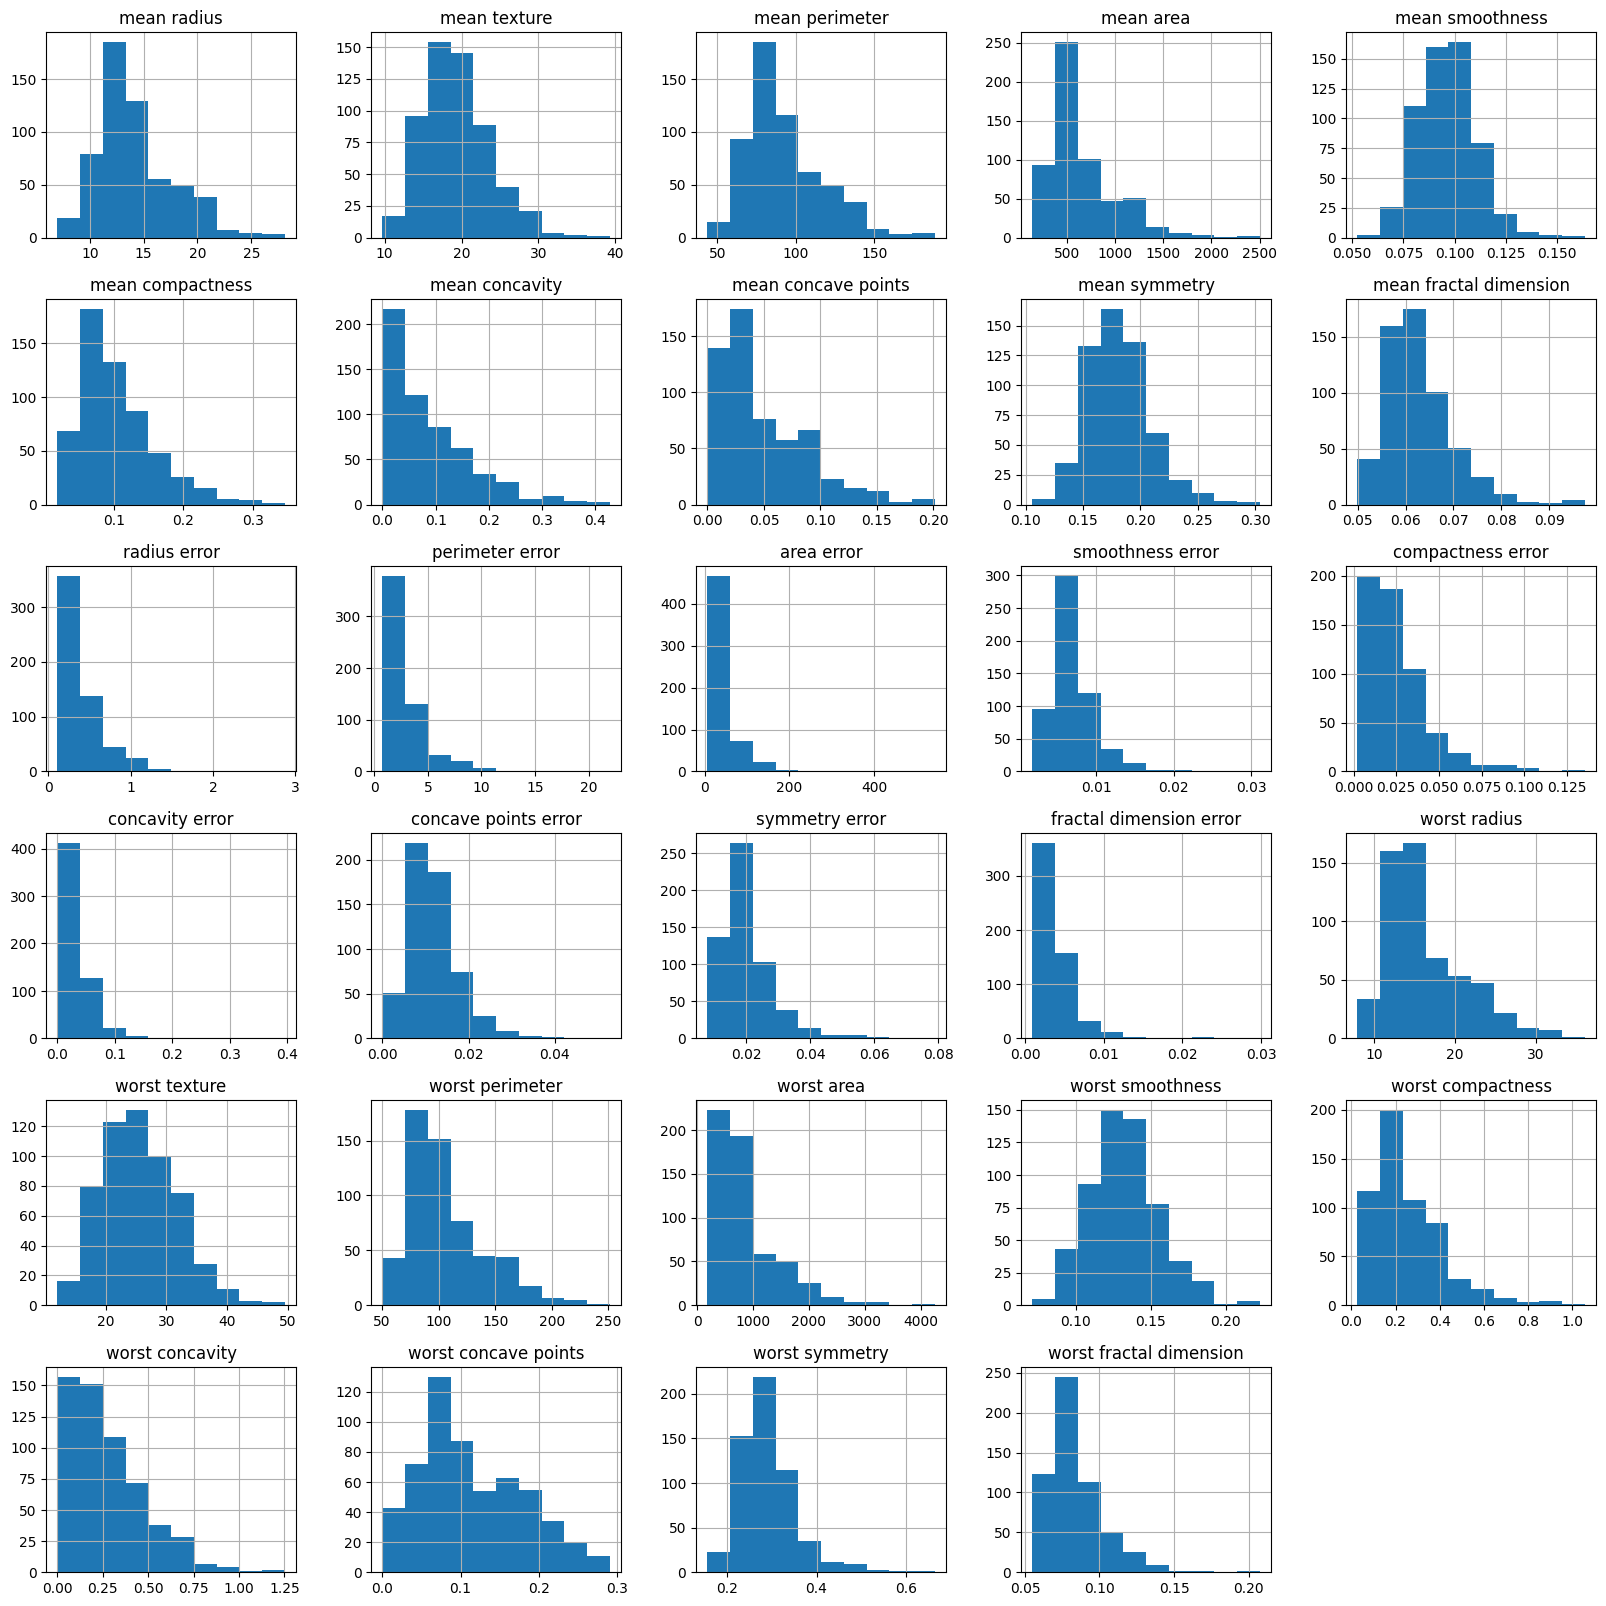

In [7]:
# plt.figure()
X.hist(figsize=(20,20)); # we use hist to show distribution of continous numeric variables
# plt.show()

## Skewness handling

### sclaing the dataset
note : look at the plots . all distributions are in range 0,1

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>],
       [<Axes: title={'center': 'mean compactness'}>,
        <Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>],
       [<Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>],
       [<Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>,
        <Axes: title={'center': 'symmetry error'}>,
        <Axes: title={'center': 'fractal dimensio

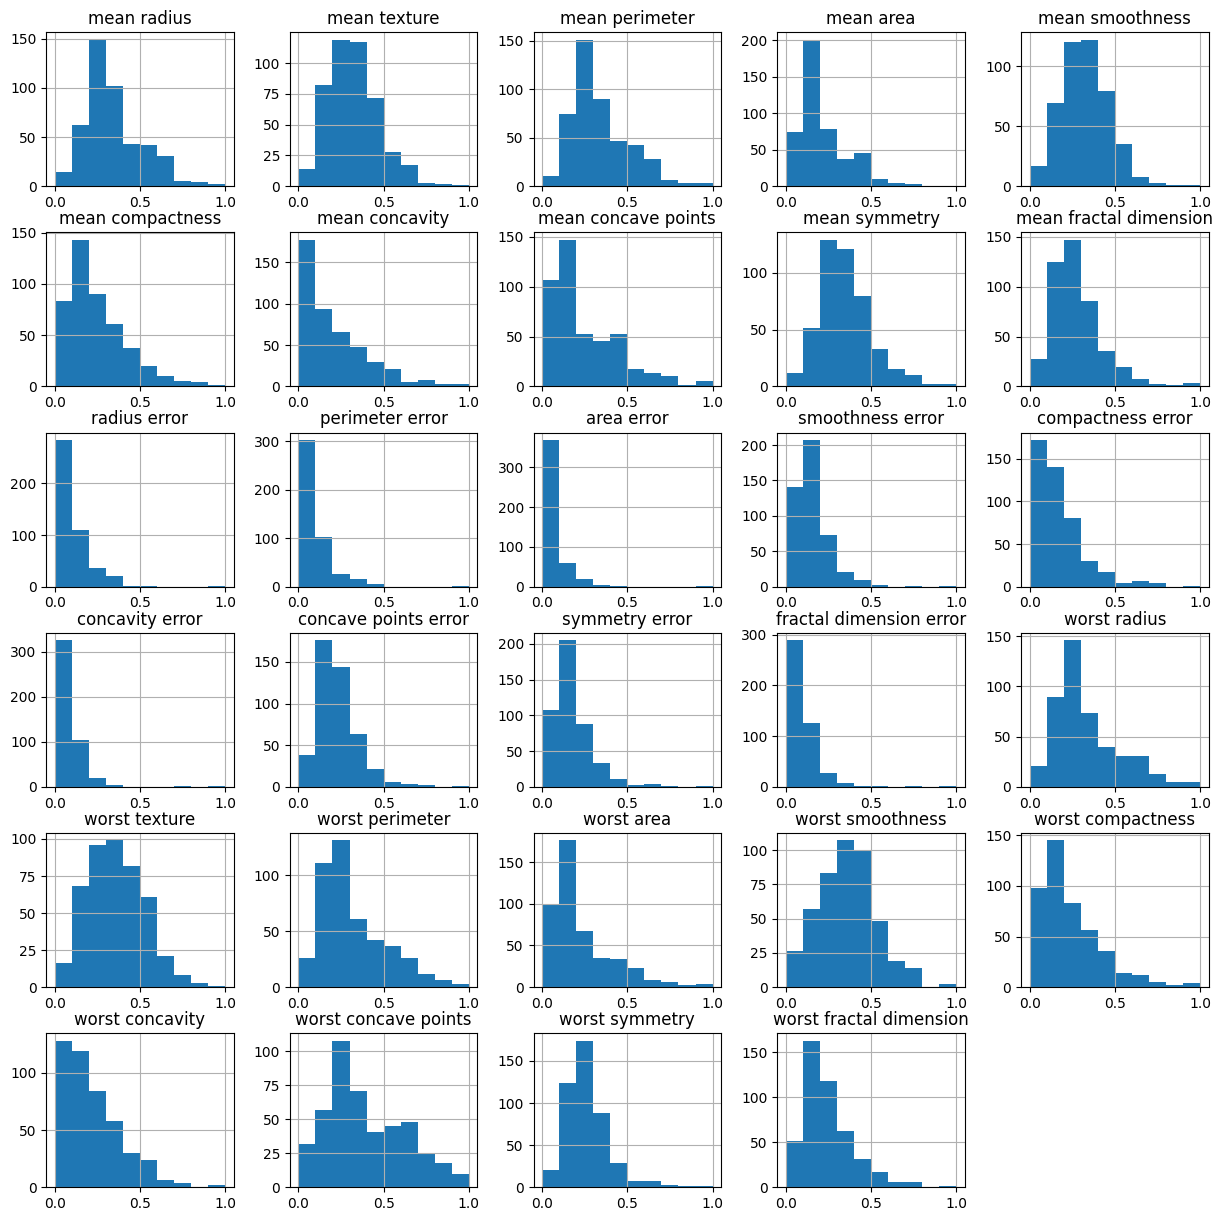

In [8]:
# train test split
X_train, X_test, y_train, y_test= train_test_split (X,y , test_size=.2)
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test =mms.transform(X_test)

#now look at this
pd.DataFrame(X_train , columns = X.columns).hist(figsize=(15,15))


## fitting the model

In [9]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred  = lr.predict(X_test)

## y test VS y pred

In [10]:
# y_te = pd.DataFrame(y_test , columns=['y_test'] )
y_pr = pd.DataFrame(y_pred ,columns=['y_pred'])
pd.concat([y_test.reset_index(drop=True) , y_pr] , axis=1) # why di we using reset_index() ? indices are not regular unlike the y_predict

,texture error,y_pred
0,0.9671,0.947667
1,1.6520,1.408570
2,0.6372,0.620007
3,0.5380,0.572140
4,1.3770,1.291385
...,...,...
109,0.7394,0.659572
110,1.3060,0.599485
111,1.0730,1.261119
112,1.3040,1.439319


### Evaluate the model

In [11]:
mean_squared_error(y_test , y_pred) , r2_score(y_test , y_pred)

(0.15937562856489618, 0.5690574085605095)

## convert Linear Regression to polynomial linear regression
note : polynomial regression has got a hyperparameter (features degree)

In [12]:
# these are created after spliting : X_train , X_test , y_train , y_test

poly = PolynomialFeatures(degree = 2)
X_train = poly.fit_transform(X_train) # = fit , transform
X_test = poly.transform(X_test)

# now we generated new features -> so these are should scale
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test =mms.transform(X_test)

# fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred  = lr.predict(X_test)

In [13]:
mean_squared_error(y_test , y_pred) , r2_score(y_test , y_pred)

(35.916396016148944, -96.1158822320426)

we r unable to run this model on higher than degree 2 because of RAM crashing

note : \
Data leakage is crucial in these scenarios. For example, when handling skewness, it's important to pay attention to this issue: first, fit on the training data, then transform the test data using the same fit. In some methods, such as applying a log transformation to handle skewness, fitting is not explicitly defined. Why, then, is it not important to fit PolynomialFeatures on the test data? This method simply transforms the features into higher dimensions. However, it's still advisable to be cautious, even if it doesn't seem critical.



### K neighbors regression


In [14]:
X = load_iris().data
df = pd.DataFrame(X ,columns = load_iris().feature_names)

X_train, X_test, y_train, y_test = train_test_split(df.drop('petal length (cm)', axis=1) , df['petal length (cm)'] , random_state=1)
####
# after EDA and preprocessing
####
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train , y_train )
y_pred = knn_reg.predict(X_test)

r2_score (y_test , y_pred)



#
# knn_reg.fit()

0.9722904296322752

### finding optimal number of neighbors using loops

In [15]:

# Initialize an empty list to store scores
scores = []

# Loop over different values of n_neighbors
for i in range(1, 21):
    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'R2 score for n={i} is equal to: {r2}')
    scores.append((i, r2))  # Append a tuple (i, r2) to the list

# Find the best score and corresponding n_neighbors
best_score = max(scores, key=lambda x: x[1])  # Find the tuple with the maximum R2 score
best_n_neighbors = best_score[0]
best_r2 = best_score[1]

print('#' * 37, '#' * 37, sep='\n')
print(f'The best R2 score is {best_r2} for n_neighbors: {best_n_neighbors}')

R2 score for n=1 is equal to: 0.9615161391133532
R2 score for n=2 is equal to: 0.9674092593419349
R2 score for n=3 is equal to: 0.9722904296322752
R2 score for n=4 is equal to: 0.9749765614536363
R2 score for n=5 is equal to: 0.974827447653913
R2 score for n=6 is equal to: 0.9753312399859121
R2 score for n=7 is equal to: 0.9772274819120023
R2 score for n=8 is equal to: 0.9775548015536408
R2 score for n=9 is equal to: 0.9764914549205514
R2 score for n=10 is equal to: 0.9773302379570517
R2 score for n=11 is equal to: 0.9778081887510474
R2 score for n=12 is equal to: 0.9773787024222311
R2 score for n=13 is equal to: 0.9769748807995707
R2 score for n=14 is equal to: 0.9762029281555026
R2 score for n=15 is equal to: 0.975214766532236
R2 score for n=16 is equal to: 0.9753480205589535
R2 score for n=17 is equal to: 0.9738551106226783
R2 score for n=18 is equal to: 0.9747930215138573
R2 score for n=19 is equal to: 0.974822530536892
R2 score for n=20 is equal to: 0.9747292289834367
############

### finding optimal solution using [randomized search](https://chatgpt.com/share/67719fcc-f148-800f-a7d7-caa1393085e6)

note : this method is better choice for when number of hyperparamters are 2 or more

In [16]:

# Define the hyperparameter grid
param_distributions = {'n_neighbors': range(1, 21) , 'metric':['l1' , 'l2']}     # n_neighbors is knn regressor param itself . you have to pass param name itself exactly


# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn_reg,
                                    param_distributions=param_distributions,
                                    n_iter=20,  # Number of parameter settings that are sampled
                                    scoring='r2',  # Use R2 score as the metric
                                    cv=5,  # Number of cross-validation folds
                                    verbose=1,
                                    random_state=612)

# Fit the RandomizedSearchCV on training data set
random_search.fit(df.drop('petal length (cm)', axis=1) ,
                  df['petal length (cm)'])

# Get the best parameters and best score
best_n_neighbors = random_search.best_params_['n_neighbors']
best_r2 = random_search.best_score_

# Print the results
print(f'The best R2 score is {best_r2} for n_neighbors: {best_n_neighbors}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best R2 score is 0.5310314643991175 for n_neighbors: 5


In [17]:
random_search.best_params_
estimator = random_search.best_estimator_
print(random_search.best_params_)
estimator # estimated regression is KNeighborsRegressor (given as input in above cell) with number of inputs 6 (found by randomized search)


{'n_neighbors': 5, 'metric': 'l1'}


KNeighborsRegressor(metric='l1')

In [18]:
#check the score
y_pred = estimator.predict(X_test)
r2_score(y_test , y_pred)

0.9839742845662752

### Decision tree regressor VS Random Forest Regressor
Random forest is set of some decision trees that model randomly selects some of these decision trees. \
note : in RF regressor we compute average of all results but in RF classifier we choose mode of results. \
note : usually crowdsourcing is works better than expert (similar to random forest) \  
in random forest each tree has got some features.

### Decision tree

max depth arg \
note : higher max_depth  can make overfitting \
note : lower min_samples_leaf , min_samples_split can make overfitting

In [19]:
for i in range(2,20):
  dt = DecisionTreeRegressor(max_depth=i , random_state=42)
  dt.fit(X_train , y_train)
  y_pred = dt.predict(X_test)
  print("#"*50)
  print(f'for max_depth {i} , R2 score related to test data is {r2_score(y_test , y_pred)}')
  print(f'for max_depth {i} , R2 score related to train data itself is {r2_score(y_train , dt.predict(X_train))}')

##################################################
for max_depth 2 , R2 score related to test data is 0.9449664611991784
for max_depth 2 , R2 score related to train data itself is 0.9307917840442601
##################################################
for max_depth 3 , R2 score related to test data is 0.9637783622211851
for max_depth 3 , R2 score related to train data itself is 0.9687103589915453
##################################################
for max_depth 4 , R2 score related to test data is 0.9555787224071015
for max_depth 4 , R2 score related to train data itself is 0.9853665897962415
##################################################
for max_depth 5 , R2 score related to test data is 0.9527578426120213
for max_depth 5 , R2 score related to train data itself is 0.990598083185174
##################################################
for max_depth 6 , R2 score related to test data is 0.9586975049704094
for max_depth 6 , R2 score related to train data itself is 0.9943524124675208
######

Min samples split argument

In [20]:
for i in range(2,20):
  dt = DecisionTreeRegressor(min_samples_split=i , random_state=42)
  dt.fit(X_train , y_train)
  y_pred = dt.predict(X_test)
  print("#"*50)
  print(f'for max_depth {i} , R2 score related to test data is {r2_score(y_test , y_pred)}')
  print(f'for max_depth {i} , R2 score related to train data itself is {r2_score(y_train , dt.predict(X_train))}')

##################################################
for max_depth 2 , R2 score related to test data is 0.9486584222509933
for max_depth 2 , R2 score related to train data itself is 0.9998720634240499
##################################################
for max_depth 3 , R2 score related to test data is 0.9479887494977455
for max_depth 3 , R2 score related to train data itself is 0.9981520272362755
##################################################
for max_depth 4 , R2 score related to test data is 0.9406297900203877
for max_depth 4 , R2 score related to train data itself is 0.9967589400759294
##################################################
for max_depth 5 , R2 score related to test data is 0.9436805214518504
for max_depth 5 , R2 score related to train data itself is 0.995439297986962
##################################################
for max_depth 6 , R2 score related to test data is 0.9474491172721005
for max_depth 6 , R2 score related to train data itself is 0.9943025578176863
######

### Random Forest

In [21]:
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test , y_pred )

0.9750074824768963

Difference between 'best' , 'random' splitters :

What are criterions ?

### XG Boost
is very similar to Random Forest , but in random forest trees are independent. \
In XGBoost, trees are built sequentially, where each subsequent tree attempts to correct the errors (residuals) made by the previous tree. This method is known as gradient boosting.
note : XGBoost uses a gradient descent optimization algorithm to minimize the error or loss function, which makes it very efficient in terms of computation and predictive accuracy. \
Boosting involves sequential learning, which is not easily parallelizable, though XGBoost has optimizations to speed up training by leveraging hardware like GPUs unlike Random forest. \
about hyperparameters : Random Forest	Fewer parameters to tune, XGBoost has got	Many parameters to tune. this makes XGBoost more flexible but parameter tune for it is harder.



In [33]:
xgbr = XGBRegressor(n_estimator = 100 , learning_rate=0.1 , random_state=42) # this package syntax is very similar to SKlearn

# rscv = RandomizedSearchCV()

xgbr.fit(X_train , y_train)
y_pred = xgbr.predict(X_test)
r2_score(y_test , y_pred)




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:30:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


0.9577474466985407

### CatBoost
is very similar to XGB but it's better for categorical features

In [52]:
cbr = CatBoostRegressor(iterations=100, learning_rate=0.08 , random_state=42 , verbose=0)
cbr.fit(X_train , y_train)
y_pred= cbr.predict(X_test)
r2_score(y_test  ,y_pred )

0.9699114646754553